# Instructions to run the programs
Hello, STAT 181-ers! I hope you enjoyed the STAT 181 course and are ready to play with some models deployed on a financial time series data. This is a jupyter-notebook in which the code is written in python. The regions with the python code are called cells. To execute the piece of code, you can take the following paths: 

1. Hover over the cells and you will see a play button like such (⏵) on the left hand side of the cell. Clicking the play button will execute the cell. 
2. Press Cmd + Enter (if on OS X) OR Press Ctrl + Enter (in Linux or Windows) 
3. Go to Runtime > Run Selection to run a particular cell. 


## GOAL OF THE PROJECT
Once STAT 181 is over I'm pretty sure that you will be bored. Don't worry though! We have tons of data to get handsy with. Might as well make some money. That's slightly better than being bored, right? Let's investigate trading Bitcoin. 

The Bitcoin price data has been split into two parts: 

1. Training 
2. Testing 

The parameters of the model would be trained using the training data, which would be then used on the unseen test data through executing a strategy, from which some profit/loss would be incurred. Try to make a model which produces the maximum profit over the test set. The questions have been provided to guide you along the way. 

## Mode of Submission
Please print the notebook either by:
1. Going to File > Print
2. Press Ctrl + P (Linux or Windows) or Cmd + P (Mac)

Type in your answers by clicking twice and editing the text cells. Upload the PDF of the final document by following the steps above to print it and upload it on ***Assign2***. 

***(For the Advanced $\LaTeX$ Geek!)*** You can directly convert the colab notebook to a $\TeX$ file. To do so, follow these steps: 

1. Go to File > Download > Download .ipynb
2. Store it to a `path = <path-to-the-notebook>`
3. On your terminal (You can use WSL if in windows) type `jupyter nbconvert path --to latex`.

## Markov Observation Model
The following is the python code for Markov Observation Model.

In this algorithm, X's are the hidden states of bitcoin. 

Y's are the observation sequence of the bitcoin prices. The data can be found on [Bitcoin USD, Yahoo Finance Data](
https://ca.finance.yahoo.com/quote/BTC-USD?p=BTC-USD&.tsrc=fin-srch) under the historical data section. 

In [119]:
#@title Importing essential libraries
!pip install --user yahoofinance
!pip install --user jupyter-dash
import yfinance as yf
import sys
import pandas as pd
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
from sklearn.preprocessing import normalize
from tabulate import tabulate
import plotly.graph_objects as go

# %matplotlib notebook
np.random.seed(10)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Question: Try to detect uptrend and downtrend regions from the graph. 
Interactive plot to determine uptrend and downtrend regions



In [120]:
# A section bitcoin price data from yahoo finance:
# This section of the code is for initialization

train_start = datetime(2018, 9, 1)
train_end = datetime(2022, 9, 1)
test_start = datetime(2022, 9, 1)
test_end = datetime(2023, 9, 1) 

## Importing the Google finance

bitcoin = yf.Ticker("BTC-USD")
dat = bitcoin.history(start = train_start, end = test_end, interval = "1d")
train_dat = bitcoin.history(start = train_start, end = train_end, interval = "1d")
test_dat = bitcoin.history(start = test_start, end = test_end, interval = "1d")
print(train_dat.shape)

(1461, 7)


In [81]:
#@title Interactive plot to examine stock data
import plotly.graph_objects as go
def click_callback(trace, points, selector):
    print("Click")

fig = go.Figure([go.Scatter(x=train_dat.index, y=np.log(train_dat['Close']))])
#fig
fig.data[0].on_click(click_callback)
fig




# Q1. Note prices are the observed Markov Chain 
 
a) What could be the hidden states model? 

Ans: 

b) How many hidden states would you want to use? What does each of the hidden states represent?
 
Hint: Increasing the number of hidden states would increase model performance. 

Ans: 





In [83]:
#@title Enter the number of states of the hidden feature in the form below

b = 25 #number of bins

s =  2 #@param {type:"integer"}

Y = dat['Close']
N = len(train_dat)

df1 = np.log(Y) #log transformation of the closing price
df2 = pd.cut(df1, bins = b, labels=range(0, b)) #bins df1 from 0 to b-1
df3 = df1, df2

log_close_binned = pd.concat(df3, axis = 1, keys = ["LogPrice", "Bins"])

Y = [int(i) for i in list(df1)]
Y_train = Y[:len(train_dat)]
Y_test = Y[len(train_dat):]

If you need to set multiple dates, put a comma between the dates like such 
```2011-11-25, 2014-6-26```. Also, note that these dates must be in ascending order. 




# Setup 1 Based on the interactive plot above, can you estimate the dates on which your hidden state transitions occurred?
---
For example, if the estimated dates for these transitions are '2018-12-25', ' 2019-6-26', '2020-3-12', '2021-4-15', '2021-7-20', '2021-11-8', you would input 

1. The number of dates when transitions occured : 6
2. The above dates without quotation marks or apostrophes: 2018-12-25, 2019-6-26, 2020-3-12, 2021-4-15, 2021-7-20, 2021-11-8

In [84]:
#@title Provide the set of dates for transition in yyyy-mm-dd format

num_dates = 6 #@param {type:"integer"}
# dates = [pd.Timestamp(datetime(2018, 12, 15)), pd.Timestamp(datetime(2019, 7, 3)), pd.Timestamp(datetime(2020, 3, 14)), pd.Timestamp(datetime(2021, 4, 11)),
#        pd.Timestamp(datetime(2021, 7, 20)), pd.Timestamp(datetime(2021, 11, 8))]
date = "2018-12-25, 2019-6-26, 2020-3-12, 2021-4-15, 2021-7-20, 2021-11-8"#@param {type:"string"}
date = date.split(',')
format = "%Y-%m-%d"
dates = [pd.to_datetime(item, format=format) for item in date]
# dates = [pd.Timestamp(datetime(2018, 12, 15)), pd.Timestamp(datetime(2019, 6, 26)), pd.Timestamp(datetime(2020, 3, 12)), pd.Timestamp(datetime(2021, 4, 15)),
#         pd.Timestamp(datetime(2021, 7, 20)), pd.Timestamp(datetime(2021, 11, 8))]

# These dates have been set according to the start of the uptrend
date_indices = []
for i in dates:
  for j in range(len(train_dat.index)):
      if train_dat.index[j].date() == i.date():
        date_indices.append(j)
        break
date_indices.append(0)
date_indices.append(len(train_dat.index) - 1)
date_indices.sort()
print(date_indices)
print("Input dates are the following:", date)

[0, 115, 298, 558, 957, 1053, 1164, 1460]
Input dates are the following: ['2018-12-25', ' 2019-6-26', ' 2020-3-12', ' 2021-4-15', ' 2021-7-20', ' 2021-11-8']


# Q2: Specify these hidden state transitions and explain what each of these mean. 
> For example, if the estimated dates for these transitions are '2018-12-25', ' 2019-6-26' and the hidden states are (0,1,2) , and let us say on '2018-12-25' the transition occured from 0 to 2 and on '2019-6-26 the transition happened from 2 to 1 write it in the following manner: 

1. '2018-12-25': $ 0 \to 2 $
2. '2019-6-26': $2 \to 1$

We will use this information to setup the Guided Initialization. 

<em> Ans: </em> 



# Core Forward Algorithms
### Forward Pi iteration

In [85]:
# Forward propagation.
def ForwardpiZero(mu):
    pi_zero = mu  
    return pi_zero

In [86]:
def Forwardpi(p,q,mu,N,Y):
  '''
  $\rho_1, \ldots \rho_n \in \mathbb{R}^s$ where s := Number of hidden states

  '''
  pi = np.zeros((s,N)).reshape(s,N) # Initialization
  rho = np.zeros((s, N))
  a = np.zeros(N)
  for x in range(s):
    rho[x, 0] = np.sum([np.sum(mu[x_0, :]*p[x_0, x]*q[x, :, Y[0]]) for x_0 in range(s)])
  a[0] = np.sum(rho[:, 0])
  pi[:, 0] = rho[:, 0]/a[0]

  for n in range(1, N):
    rho[:, n] = q[:, Y[n-1], Y[n]]*(np.sum(pi[:, n - 1].reshape(s, 1)*p[:, :], axis = 0))
    # print(rho.shape)
    a[n] = np.sum(rho[:, n])  
    pi[: ,n] = rho[:, n]/a[n]
  return (pi, a, rho)

### The Backward Iteration
The backward algorithm is a function of the $a$, and $\chi$ matrices. 

In [87]:
# Backward propagation.
# Works only for s = 2. 
def Backwardchi(p,q,a,N,Y):
    chi = np.zeros((s, N-1)).reshape(s,N-1)
    chi[:, N - 2] = q[:, Y[N-2], Y[N-1]]

    for n in range(N-3, -1, -1):
      # print(n)
      # print(np.sum((chi[:, n+1].reshape(1, s)*p[:, :]), axis = 1))
      chi[:, n] = ((q[:, Y[n],Y[n+1]].reshape(s,1)/a[n+1]) *(np.sum((chi[:, n+1].reshape(1, s)*p[:, :]), axis = 1).reshape(s, 1))).reshape(s, )

    return chi


def BackwardchiZero(chi,p,q,a,N,Y):
    chi_zero = np.zeros((s, b)).reshape(s,b)
    for y in range(b):
        chi_zero[:, y] = ((q[:, y, Y[0]].reshape(s, 1)/a[0]) *(np.sum((chi[:, 0].reshape(1, s)*p[:, :]), axis = 1).reshape(s, 1))).reshape(s, )
        # chi_zero[0,y] = (q_zero[y,Y[0]]/a[0]) * (chi[0,0]*p[0,0]+ chi[1,0]*p[0,1])
        # chi_zero[1,y] = (q_one[y,Y[0]]/a[0]) * (chi[0,0]*p[1,0]+ chi[1,0]*p[1,1])
    
    # chi_zero = normalize(chi_zero, axis = 0, norm = "l1")
    return chi_zero


### Update Probabilities
---
Update probabilities:

In [88]:
# Now that we have all the elements for EM, start updating probabilities
def MQ(p, pi_zero, pi, chi_zero, chi, N, Y):
    q_new = np.zeros((s, b, b))
    for y in range(b):
        q_new[:, y, Y[0]] = (chi_zero[:, y].reshape(s, 1) * (np.sum(p[:, :]*pi_zero[:, y].reshape(s, 1), axis = 0).reshape(s, 1))).reshape(s,)
    for n in range(N - 1):
        q_new[:, Y[n], Y[n + 1]] = (q_new[:, Y[n], Y[n+1]].reshape(s, 1) + chi[:, n].reshape(s, 1) * (np.sum(p[:, :]*pi[:, n].reshape(s, 1), axis = 0).reshape(s, 1))).reshape(s, )
    row_sum = q_new.sum(axis = 2)
    for row in range(b):
        for x in range(s):
            if row_sum[x, row] != 0:
                q_new[x, row, :] = q_new[x, row, :]/row_sum[x, row]

    return q_new 

In [89]:
def MMu(p,mu,chi_zero):
    mu_new = np.zeros((s, b))
    for y in range(b):
        mu_new[:, y] = (mu[:, y].reshape(s, 1) * (p @ chi_zero[:, y].reshape(s, 1))).reshape(s,)
        # mu_new[0,y] = mu[0,y]*(chi_zero[0,y]*p[0,0]+chi_zero[1,y]*p[0,1])
        # mu_new[1,y] = mu[1,y]*(chi_zero[0,y]*p[1,0]+chi_zero[1,y]*p[1,1])
        total = sum(list(mu_new.sum(axis=1)))
    for i in range(s):   
        for j in range(b):
            if total != 0:
                mu_new[i,j] = mu_new[i,j]/total
            # else do nothing
    #print(sum(list(mu_new.sum(axis=1))))
    return mu_new

In [90]:

def MP(p, pi_zero, pi, chi_zero, chi):
    p_old = p
    p_new = np.zeros((s, s))
    p_new = p_old * (pi_zero @ chi_zero.T + pi[:, :-1] @ chi.T) 
    row_sum = p_new.sum(axis = 1)
    p_new = p_new/row_sum[:, np.newaxis]

    return p_new


Now we have the initial randomly generated estimates of $p$, $q_0$, $q_1$ and $μ$ needed for the EM algorithm.

---



# Q3. Initializing the transition rates.

In a Markov Observation Model, there are two transitions of interest: 

1. $P\left(X_{n+1}=x \mid Y_0=y_0, \ldots, Y_n=y_n ; X_0=x_0, \ldots, X_n=x_n\right)=p_{x_n \rightarrow x}$
2. $P\left(Y_{n+1}=y \mid Y_0=y_0, \ldots, Y_n=y_n ; X_0=x_0, X_n=x_n, X_{n+1}=x_{n+1}, \ldots, X_N=x_N\right)=q_{y_n \rightarrow y}\left(x_{n+1}\right)$

To get the estimates of these transition probabilities, we use the E.M. Algorithm. Starting from some initial values of these probabilities can be more fruitful than others. We can judge the best models using a quantitative measure such as the <b>Bayes Factor</b>. 
> *Definition* The Bayes factor is a measure of relative evidence, the comparison of the predictive performance of one model against another one. This comparison is a ratio of marginal likelihoods: $$ B F_{12}=\frac{P\left(\boldsymbol{y} \mid \mathscr{M}_1\right)}{P\left(\boldsymbol{y} \mid \mathscr{M}_2\right)} $$
$B F_{12} $ indicates the extent to which the data are more likely under $\mathscr{M_1}$  over $\mathscr{M_2}$ or in other words, which of the two models is more likely to have generated the data, or the relative evidence that we have for  $\mathscr{M_1}$ over  $\mathscr{M_2}$. [1] 


The higher the bayes factor, the better is your model (MOM) in comparison with the base model (The base model here being: $(X, Y)$ are independent Markov Chains).  Now that we have set up the foundations, the problem you would solve is the following: 

<blockquote> <b> <em> <u>Question</u> : </em> </b> For 10 models with random initializations, find the Bayes Factor of the best model. This is your best model out of the 10 random initializations. Report the best model and its Bayes Factor. Would you use this model in practice for predictions? Why or why not?
Also report the best $P$, $Q$ and $\mu$ matrices you finally get after running the programs. 
</blockquote>

Answer: 

References: 

[1] https://vasishth.github.io/bayescogsci/book/ch-bf.html#bayes-factor

In [91]:
#Code for initial p, q, and mu matrix
def InitialP(s):
    p_v = []
    for i in range(s):
        p_r = np.random.uniform(0,1,s) #change 2 to some other number depending on the number of hidden states
        p_r /= p_r.sum()
        p_v.append(p_r)
    p = np.array(p_v)
    return p

def InitialQ(N, Y, s: int):
    q = np.zeros((s, b, b))
    for x in range(s):
        for n in range(N-1):
          q[x, Y[n],Y[n+1]] += 1
        row_sum = q.sum(axis=2)
        print(row_sum.shape)
        for row in range(b):
          for coln in range(b):
              if row_sum[x, row] > 0 and q[x, row, coln] > 0:
                q[x, row,coln] = q[x, row,coln]*np.random.uniform(0,1,1)
        row_sum_new = q.sum(axis=2)

        for i in range(b):   
          for j in range(b):
            if row_sum_new[x, i] != 0:
              q[x, i, j] = q[x, i, j]/row_sum_new[x, i] 
    return q  

def Initialmu(q, Y):
  '''
  $\mu \in \mathbb{R}^{s \times b}$
  where s := Number of hidden states
  and N := Total observations
  '''
  mu = np.zeros((s, b))
  print(mu.shape)
  mu = np.random.rand(s, b)
  for x in range(s):
    for row in range(b):
      if q[x, row, Y[0]] > 0:
        continue 
      else: 
        mu[x, row] = 0
  # for x in range(s): 
  #   for row in range(b): 
  #     if q[row,Y[0], x] > 0:
  #       mu[x,row] = np.random.uniform(0,1,1)    
  #     else:
  #       mu[x,row] = 0

  sum = mu.sum()
  mu = mu/sum
  return mu

The forward algorithm is a function of the $\pi$, $a$, and $\rho$ matrices. 

## Model Selection 
$\bar{q}_{i \to j} = \frac{\text{#transitions from $i$ to $j$}}{\text{#occurences of $i$}}$

In [92]:
def Q_ref(Y, N):
    q_bar = np.zeros((b, b))
    for i in range(1, N):
        q_bar[Y[i-1], Y[i]] += 1
    row_sum = list(q_bar.sum(axis=1))
    for row in range(b):
        if row_sum[row] != 0:
            q_bar[row] = q_bar[row]/row_sum[row]
    return q_bar
q_bar = Q_ref(Y, N)


In [93]:
def Predictorlist(p, q, mu, q_bar, Y, N):
    '''
    \rho_j(x_i) for all i \in N in the MOMBF1 draft 
    is represented by predictor_dist[j - 1, i - 1]
    The required number of rho's are N, since \rho_{N} is the last predictor 
    Even though \rho_{N} is the last predictor in the predictor sequence, 
    to compute the last Bayes factor we use \rho_{N - 1}, 
    since only observed data is used for model comparison. 
    $\rho_{N} provides the predicted distribution of 
    next hidden stated, given the observed data upto time $N$. 
    '''
    predictor_dist = np.zeros((N, s))
    temp = np.zeros(s)
    for x in range(s):
        # temp[x] = np.sum([np.sum(mu[x_0, :]*p[x_0, x]*np.where(q_bar[:, Y[0]] != 0, q[x, :, Y[0]]/q_bar[:, Y[0]], 0)) for x_0 in range(s)])
        temp_ = np.array([(q[x, z, Y[0]]/q_bar[z, Y[0]] if q_bar[z, Y[0]] != 0 else 0) for z in range(b)])#np.where(q_bar[:, Y[0]] != 0, q[x, :, Y[0]]/q_bar[:, Y[0]], 0)
        temp[x] = np.sum([np.sum(mu[x_0, :]*p[x_0, x]*temp_) for x_0 in range(s)])

    for i in range(N):
        for x in range(s):
            if i == 0:
                predictor_dist[0, x] = temp @ p[:, x]
            else:
                temp_ = q[:, Y[i - 1], Y[i]]/q_bar[Y[i - 1], Y[i]] if q_bar[Y[i - 1], Y[i]] != 0 else 0
                predictor_dist[i, x] = np.sum(temp_ * p[:, x] * predictor_dist[i - 1, :])

    return predictor_dist



    
def BayesFactor(predictor_rho, q, N, Y):
    B = np.zeros(N)
    for i in range(N):
        B[i] = np.sum(predictor_rho[i, :])
    # print(B[-1])
    B[-1] = np.sum([((predictor_rho[N-2, x] * q[x, Y[-2], Y[-1]]/q_bar[Y[-2], Y[-1]]) if q_bar[Y[-2], Y[-1]] != 0 else 0) for x in range(s)])
    # print(B[-1])
    return B

---
Iteration until convergence:

In [94]:
def Stop(p_new ,mu_new, q_new, p, mu, q, k):

    #print(k)

    p_new = p_new
    p = p
    difp = np.subtract(p_new, p)
    sdifp = np.nansum(np.abs(difp))

    q = q
    q_new = q_new
    mu_new = mu_new
    mu = mu
    difmu = np.subtract(mu_new, mu)
    sdifmu = np.nansum(np.abs(difmu))

    np.set_printoptions(suppress=True)

    if sdifp < 5e-3 and sdifmu < 5e-3:
        # print("Penultimate p matrix: ", p)
        # print("Final p matrix: ", p_new)
        # print("Final mu matrix: ", mu)
        return 'stop'

    else:
        return 'continue'

In [95]:
def RunModel(p, q, mu, N, Y, stoplimit = 1000):
    K = stoplimit
    for k in range(K):
        pi_zero = ForwardpiZero(mu)
        pi, a, rho = Forwardpi(p,q,mu,N,Y)
  
  # a_1, a_n = aMatrix(p,q_zero,q_one,mu,pi,N,Y)

        chi = Backwardchi(p,q, a,N,Y)
        chi_zero = BackwardchiZero(chi,p,q,a,N,Y)

  # q_zero_new = MQZero(p, pi_zero, pi, chi_zero, chi,N,Y)
  # q_one_new = MQOne(p, pi_zero, pi, chi_zero, chi, N, Y)
        q_new = MQ(p, pi_zero, pi, chi_zero, chi, N, Y)
        mu_new = MMu(p, mu, chi_zero)
        p_new = MP(p, pi_zero, pi, chi_zero, chi)

        stopcondition = Stop(p_new,mu_new,q_new, p, mu, q, k)

        if stopcondition == "stop":
            print("Stopping criteria reached at k = ", k)
            break
        else:
            p = p_new
            mu = mu_new
            q = q_new
    
    return (p, q, mu)



## Model selection using bayes factor
We intend to select a model which has the highest Bayes Factor. To do this, we initialize with various $P$, $Q$ and $\mu$ matrices and then sort the models according to their bayes factors. Play around with the number of particles to This might take some time to execute. 

In [96]:
num_particles = 10 #@param {type: "integer"}
model_initializations = {}
model_results = {}
comparison_dict = {}
for i in range(1, num_particles + 1):
    model_name = f"model{i}"
    
    model_initializations[model_name] = {}
    model_initializations[model_name]['P'] = InitialP(s)
    model_initializations[model_name]['Q'] = InitialQ(N, Y_train, s)
    model_initializations[model_name]['mu'] = Initialmu(model_initializations[model_name]['Q'], Y_train)
    
    FinalP, FinalQ, Finalmu = RunModel(model_initializations[model_name]['P'], model_initializations[model_name]['Q'], model_initializations[model_name]['mu'], N, Y_train)
    Predictor = Predictorlist(FinalP, FinalQ, Finalmu, q_bar, Y_train, N)
    comparison_dict[model_name] = np.log(BayesFactor(Predictor, FinalQ, N, Y_train)[-1]) # Take log of the Bayes Factor, since it expands exponentially. 

    model_results[model_name] = {}
    model_results[model_name]['P'] = FinalP
    model_results[model_name]['Q'] = FinalQ
    model_results[model_name]['mu'] = Finalmu

(2, 25)
(2, 25)
(2, 25)
Stopping criteria reached at k =  22
(2, 25)
(2, 25)
(2, 25)
Stopping criteria reached at k =  64
(2, 25)
(2, 25)
(2, 25)
Stopping criteria reached at k =  49
(2, 25)
(2, 25)
(2, 25)
Stopping criteria reached at k =  2
(2, 25)
(2, 25)
(2, 25)
Stopping criteria reached at k =  94
(2, 25)
(2, 25)
(2, 25)
Stopping criteria reached at k =  2
(2, 25)
(2, 25)
(2, 25)
Stopping criteria reached at k =  2
(2, 25)
(2, 25)
(2, 25)
Stopping criteria reached at k =  46
(2, 25)
(2, 25)
(2, 25)
Stopping criteria reached at k =  2
(2, 25)
(2, 25)
(2, 25)
Stopping criteria reached at k =  2


In [97]:
sorted_by_bf = sorted(comparison_dict.items(), key = lambda x: x[1])
print("The models and (log of) Bayes factor are displayed in Ascending order")
print(sorted_by_bf)
best_model = sorted_by_bf[-1]
best_model_results = model_results[best_model[0]]
print("Model with the highest Bayes Factor: ", best_model[0])
print("Bayes Factor of the best model: ", best_model[1])
print(best_model_results)

The models and (log of) Bayes factor are displayed in Ascending order
[('model9', -0.14918994914876235), ('model7', -0.13064927227014037), ('model4', -0.038650207939388705), ('model10', 0.014997368100722896), ('model6', 0.3163943590240127), ('model5', 25.19275718519645), ('model8', 25.22680218851793), ('model1', 25.268779217154012), ('model3', 25.704276768395395), ('model2', 26.825241634936578)]
Model with the highest Bayes Factor:  model2
Bayes Factor of the best model:  26.825241634936578
{'P': array([[0.99125172, 0.00874828],
       [0.09726803, 0.90273197]]), 'Q': array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
       


# Setup 2: Guided Initialization
---
In the last question, we tried to find out the best initialized model by comparing it with their Bayes Factor. Now let us try to give the model a guided initialized. The term guided initialization implies that setting up the initial probabilities in such a way, such that the model picks up features as per your design.
<blockquote> <em> (Example: Uptrends and Downtrends) </em> Let's say we wanted to recover uptrends and downtrends (uptrend is denoted by $1$ and downtrend is denoted by $0$) from the observed data (i.e. stock price of BTC). For this scenario, the total number of hidden states would be 2 (i.e. <em> s = 2 </em> ). Moreover, let's say if we assumed that if the current hidden state is uptrend, then the hidden state stays in an uptrend state on an average of 49 days. On the other hand, if the current hidden state is downtrend, then the hidden state stays in downtrend on an average of 19 days. If we believe that such an assumption was close to the truth, then we can initialize the parameter $p$ as follows: 
$$
    p = \left[\begin{array}{l}p_{0 \rightarrow 0} p_{0 \rightarrow 1} \\ p_{1 \rightarrow 0} p_{1 \rightarrow 1}\end{array}\right]=\left[\begin{array}{l}0.95 & 0.05 \\ 0.02 &0.98 \end{array}\right]
$$

</blockquote>
Now, if we were to design a transition matrix $p$ according to different interpretation of hidden states, what would the initial transition matrix look like? 
<blockquote> 
Design the initial transition matrix $p$ according to your previously described interpretation of the hidden state. 

To enter a matrix as input, follow this convention:
$$
[[p_{00}, p_{01}, \ldots, p_{0n}], [p_{10}, \ldots, p_{1n}], \ldots, [p_{n0}, \ldots, p_{nn}]]
$$


In [98]:
#@title Guided Initialization (Enter your designed $p$ matrix here [use the convention above])
def GuidedInitialP(s):
#  p = np.array([[0.98, 0.02], [0.04, 0.96]])
  # p = np.array([[0.9, 0.1], [0.01, 0.99]])
  # p = np.array([[0.997, 0.003], [0.003, 0.997]])
    p = [[0.95, 0.05], [0.02, 0.98]] #@param
    p = np.array(p)
    if p.shape != (s, s):
        raise Exception("The dimension of p doesn't match the number of hidden states")
    return p

guided_initialization = {}
guided_model_results = {}

guided_initialization['P'] = GuidedInitialP(s)
guided_initialization['Q'] = InitialQ(N, Y_train, s)
guided_initialization['mu'] = Initialmu(guided_initialization['Q'], Y_train)

FinalP, FinalQ, Finalmu = RunModel(guided_initialization['P'], guided_initialization['Q'], guided_initialization['mu'], N, Y_train)
Predictor = Predictorlist(FinalP, FinalQ, Finalmu, q_bar, Y_train, N)
# Take log of the Bayes Factor, since it expands exponentially. 

guided_model_results['P'] = FinalP
guided_model_results['Q'] = FinalQ
guided_model_results['mu'] = Finalmu

print(guided_model_results)

(2, 25)
(2, 25)
(2, 25)
Stopping criteria reached at k =  16
{'P': array([[0.99299355, 0.00700645],
       [0.05988976, 0.94011024]]), 'Q': array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]]), 'mu': array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.]])}


# Q4: Evaluating the Bayes factor and comparing it with the best model out of 10 models

> Evaluate the Bayes Factor of the Guided Model and compare it with the best model generated using random initializations. If the Bayes factor of the Guided Model is higher than that of the best of random models, the guided assumption is closer to the truth. You would notice that as you increase the number of hidden states, the Bayes Factor improves as well. Why do you think that is? 

Answer: 


In [99]:
GM_Predictor = Predictorlist(guided_model_results['P'], guided_model_results['Q'], guided_model_results['mu'], q_bar, Y, N)
GM_BF = np.log(BayesFactor(GM_Predictor, guided_model_results['Q'], N, Y)[-1])
print(GM_BF)

26.50322869863775


# Setup 3: Printing Output of the Most Likely Sequence

After recovering the Final $P, Q \, \text{and} \, \mu$ matrices, we would like to recover the most likely sequence of hidden states. You can see the most likely sequence of hidden states for either the `best model` or the `guided model`. 

## Most Likely Sequence!
---
**Viterbi algorithm**:

Using the updated transition matrices from our EM, we can implement the special case of the Viterbi algorithm for MOM. 



Input: Observational sequence $Y_1, \dots, Y_N$
Output: Most likely hidden state sequence: $P*; y_0*; x_0*, x_1*, \dots, x_N*$
Data: Transition probability matrices from EM ($P, Q_s, \mu$).

In [100]:
def DeltaZero(p_new, q_new, mu_new):
  delta_01 = np.zeros((b,s,s)).reshape(b,s,s)
  for row in range(b):
    # delta_01[row,0,0] = mu_new[0,row]*p_new[0,0]*q_zero_new[row,Y[0]]
    # delta_01[row,0,1] = mu_new[0,row]*p_new[0,1]*q_one_new[row,Y[0]]
    # delta_01[row,1,0] = mu_new[1,row]*p_new[1,0]*q_zero_new[row,Y[0]]
    # delta_01[row,1,1] = mu_new[1,row]*p_new[1,1]*q_one_new[row,Y[0]]
    delta_01[row, :, :] = (mu_new[:, row].reshape(s, 1) @ q_new[:, row, Y[0]].reshape(1, s)) * p_new

  #delta_01[delta_01 < 1E-308] = 0

  return delta_01




Forward from $n:= 3$ to $N$

In [101]:
def Delta(p_new, q_new, mu_new, delta_01):
  #for n = 1
  delta = np.zeros((N,s)).reshape(N,s)
  delta[0] = np.sum(np.sum(delta_01, axis = 0),axis = 0)
  # #for n = 2
  # delta[1,0] = max(max(delta_01[:,0,0]*p_new[0,0]), max(delta_01[:,1,0]*p_new[1,0]))*q_new[0, Y[0],Y[1]]
  # delta[1,1] = max(max(delta_01[:,0,1]*p_new[0,1]), max(delta_01[:,1,1]*p_new[1,1]))*q_new[1, Y[0],Y[1]]

  # delta[1,0] = delta[1,0] / sum(delta[1,:])
  # delta[1,1] = delta[1,1]/sum(delta[1,:])

  # for x in range(s):
  #   delta[1, x] = np.max(np.amax(delta_01[:, :, x], axis = 0) * p[:, x].reshape(s, 1))*q_new[x, Y[0], Y[1]]
  delta[1, :] = np.amax(np.amax(delta_01[:, :, :] * p_new.reshape(1, s, s), axis = 0), axis = 0)*q_new[:, Y[0], Y[1]]

  delta[1,:] = delta[1,:] / np.sum(delta[1,:])
  
  #for n: =3 to N
  for n in range(2,N): #n = 2,...N-1

    delta[n, :] = np.amax(delta[n-1, :].reshape(s, 1) * p_new, axis = 0)*q_new[:, Y[n-1], Y[n]]
    # print(np.amax(delta[n-1, :].reshape(s, 1) * p_new, axis = 0))
    # print(max(delta[n-1,0]*p_new[0,0], delta[n-1,1]*p_new[1,0]), max(delta[n-1,0]*p_new[0,1],delta[n-1,1]*p_new[1,1]))
    # delta[n,0] = max(delta[n-1,0]*p_new[0,0], delta[n-1,1]*p_new[1,0])*q_new[0, Y[n-1],Y[n]]
    # delta[n,1] = max(delta[n-1,0]*p_new[0,1],delta[n-1,1]*p_new[1,1])*q_new[1, Y[n-1],Y[n]]

    delta[n,:] = delta[n,:] / sum(delta[n,:])
    # delta[n,0] = delta[n,0] / sum(delta[n,:])
    # delta[n,1] = delta[n,1] / sum(delta[n,:])
  

  
  return delta

Backtracing $N-1$ down to 2

In [102]:
def Psi(p_new, delta_01, delta):
  #psi start from n = 2
  psi = np.zeros((N-1,s)).reshape(N-1,s)
  psi[0, :] = np.argmax(np.amax(delta_01[:, :, :] * p_new.reshape(1, s, s), axis = 0), axis = 0)
  # psi[0,0] = np.argmax(np.array([max(delta_01[:,0,0]*p_new[0,0]), max(delta_01[:,1,0]*p_new[1,0])]))
  # psi[0,1] = np.argmax(np.array([max(delta_01[:,0,1]*p_new[0,1]), max(delta_01[:,1,1]*p_new[1,1])]))

  for n in range(2,N):
    psi[n-1 :] = np.argmax(delta[n-1, :].reshape(s, 1) * p_new, axis = 0)
    # psi[n-1,0] = np.argmax(np.array([delta[n-1,0]*p_new[0,0], delta[n-1,1]*p_new[1,0]]))
    # psi[n-1,1] = np.argmax(np.array([delta[n-1,0]*p_new[0,1],delta[n-1,1]*p_new[1,1]]))

  return psi

def Termination(delta):
  P = max(delta[N-1,:])
  x_N = np.argmax([delta[N-1,:]])

  return P, x_N

def BackTracking(psi, x_N):
  x_n = np.zeros((N-1,1)).reshape(N-1,1)
  #x_n's size is (1461,1), psi's size is (1461, 2). need to fix this
  x_n[N-2] = psi[N-2, x_N]
  for i in range(N-3, 0, -1): # include index N-2 and i
     x_n[i] = psi[i+1, int(x_n[i+1])]

  return x_n

In [103]:

def print_results(model_results, data):

    p, q, mu = model_results['P'], model_results['Q'], model_results['mu']

    delta_01 = DeltaZero(p, q, mu)
    delta = Delta(p, q, mu, delta_01)

    psi = Psi(p, delta_01, delta)
    P, x_N = Termination(delta)


    out = BackTracking(psi, x_N)
    fig, ax = plt.subplots()
    axes = [ax, ax.twinx()]
    colors = ['blue', 'orange']
    fig.suptitle('Plots of likely states and log price')

    axes[0].plot(1*out[0:len(data)], alpha = 0.75, label="Likely State", color='blue')
    axes[1].plot(range(len(data)),df1[0:len(data)], label = "Log Price", color='orange')
    axes[0].set_ylabel("Hidden State")
    axes[1].set_ylabel("Log Price of Bitcoin")
    # plt.plot(range(1000), 8.0 + 3.5*pi_n[1, :1000], alpha = 0.25)
    fig.legend()
    fig.show()


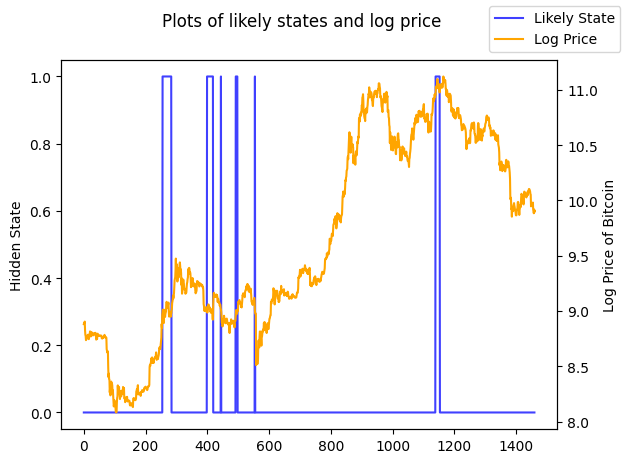

In [118]:
#@title Print plots of the likely hidden state sequence and the log price
model_results = best_model_results #@param ["best_model_results", "guided_model_results"] {type:"raw"}
print_results(model_results, train_dat) 



# Q5: Test your hypothesis for the guided model by looking at the most likely hidden state sequence

<blockquote> <em> <b> (Question) </b> </em> Look at the plot of most likely hidden state sequence. Try to verify the model's interpretation of the hidden state as compared to your interpretation of it. 

</blockquote> 

<blockquote> 
Moreover, according to you, what does the hidden state of the best random model represent? Does the hidden state sequence for the guided model capture the desired features? 
</blockquote>

Answer: 
 

# Setup 4: Employ a strategy to make money using limited transactions
When would you exercise your transactions? We would like to emulate this using a real-life scenario, considering your only know the stock's history upto the current time. How would you use your current states to make money? The only caveat being, only a single amount of the stock can be bought or sold.  

<!-- For maximum profit: https://www.geeksforgeeks.org/maximum-profit-by-buying-and-selling-a-share-at-most-k-times/ -->

<!-- <b> Hint: Use the 1-step predictor </b>  -->

Let's say $\alpha \in (0, 1)$ represents your risk index. The more risk you are willing to take, you would not wait for the stock to go too high/low before selling/buying the stock. Let's say you are at the hidden state $X_{current}$ and you would like to exercise the transaction (buy/sell) when you reach a particular hidden state $X_{desired}$, when you would exercise the transactions. 

*Hint*: You are willing to sell your stock, if you are in certain transition states while you would buy in others. 
<br>
### <em> Rules of the Game: 
<blockquote> Assume you start with 1 stock and you can either hold it or sell it but you <u> can not buy or hold more than 1 stock at a single point of time</u>. If you sell the held stock, you now have room to buy 1 more stock. You can buy or sell <u> upto 10 times </u>.  
</blockquote> </em>

Employ the hidden states you designed to construct a strategy that would help you make money from the test set (The test set is the future trajectory of the Bitcoin price).


In [115]:
#@title Setting parameters for the test set
N_test = len(Y_test) 
num_transactions = 10
alpha = 0.25 #@param {type:"number"}
buy_transitions = [1] #@param #if the stock is increasing
sell_transitions = [0] #@param #if the stock is decreasing
Model = best_model_results #@param ["best_model_results", "guided_model_results"] {type:"raw"}
# if past_action = 0, not yet invested
# if past_action = 1, bought 
# if past_action = -1, sold

In [117]:
OnestepPreds = Predictorlist(Model['P'], Model['Q'], Model['mu'], q_bar, Y_test, N_test)
PredProbs = OnestepPreds/np.sum(OnestepPreds, axis = 1).reshape(N_test, 1)
past_action = 1
possible_action = -1 * past_action
profit = 0 

exec_transactions = 0
threshold = 1 - alpha 
past_price = test_dat['Close'][0]
print("Initial Price of 1 bitcoin:", past_price)
for i in range(len(OnestepPreds)):
    if exec_transactions >= 10:
        break
    if past_action == 1:
        for item in sell_transitions:
            if PredProbs[i][item] > threshold:
                past_action = -1
                profit += test_dat['Close'][i + 1] - past_price
                # print(profit)
                past_price = 0
                exec_transactions += 1
                print("1 Bitcoin was sold at a price of:", test_dat['Close'][i + 1])
                break 
            else:
                continue
    elif past_action == -1: 
        for item in buy_transitions:
            if PredProbs[i][item] > threshold:
                past_action = 1
                past_price = test_dat['Close'][i + 1]
                exec_transactions += 1
                print("1 Bitcoin was bought at price: ", past_price)
                break
            else:
                continue
        
if profit < 0: 
    print("You incurred a loss of: $", -profit)
else:
    print("You profited: $", profit)

Initial Price of 1 bitcoin: 20127.140625
1 Bitcoin was sold at a price of: 18837.66796875
You incurred a loss of: $ 1289.47265625


# Q6: Explain your strategy to make money

> ***(Question)*** Explain how you used the hidden states to make a decision to buy or sell Bitcoin? What more information could you use to make a better decision (Not necessarily related to the Markov Observation Model paradigm)? 

Answer: 